In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_credit = pd.read_csv("D:\Learnmore\DBM\Data Mining\Dataset\german_credit.csv")

In [4]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

In [5]:
df_credit.head(5)

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


### EDA

In [9]:
def create_crosstab_value(feature):
    taba = pd.crosstab(df_credit[feature], df_credit['Creditability'], margins=True, dropna=False)
    tabb = pd.crosstab(df_credit[feature], df_credit['Creditability'], margins=True, dropna=False, normalize=True)
    tab = taba.join(tabb, lsuffix='_No', rsuffix='_Percentage')
    tab.columns = tab.columns.map(lambda x: tuple(x.split('_')))
    tab = (tab.sort_index(ascending=[True, False] , axis=1)
            .rename_axis(columns=['Creditability', 'count_pct'], axis=1)
       )
    return tab

In [10]:
tab_account_balance = create_crosstab_value("Account Balance")
tab_account_balance

Creditability            0               1             All      
count_pct       Percentage   No Percentage   No Percentage    No
Account Balance                                                 
1                    0.135  135      0.139  139      0.274   274
2                    0.105  105      0.164  164      0.269   269
3                    0.014   14      0.049   49      0.063    63
4                    0.046   46      0.348  348      0.394   394
All                  0.300  300      0.700  700      1.000  1000

In [11]:
tab_Instalment_per_cent = create_crosstab_value("Instalment per cent")
tab_Instalment_per_cent

Creditability                0               1             All      
count_pct           Percentage   No Percentage   No Percentage    No
Instalment per cent                                                 
1                        0.034   34      0.102  102      0.136   136
2                        0.062   62      0.169  169      0.231   231
3                        0.045   45      0.112  112      0.157   157
4                        0.159  159      0.317  317      0.476   476
All                      0.300  300      0.700  700      1.000  1000

In [12]:
tab_Purpose = create_crosstab_value("Purpose")
tab_Purpose

Creditability          0               1             All      
count_pct     Percentage   No Percentage   No Percentage    No
Purpose                                                       
0                  0.089   89      0.145  145      0.234   234
1                  0.017   17      0.086   86      0.103   103
2                  0.058   58      0.123  123      0.181   181
3                  0.062   62      0.218  218      0.280   280
4                  0.004    4      0.008    8      0.012    12
5                  0.008    8      0.014   14      0.022    22
6                  0.022   22      0.028   28      0.050    50
8                  0.001    1      0.008    8      0.009     9
9                  0.034   34      0.063   63      0.097    97
10                 0.005    5      0.007    7      0.012    12
All                0.300  300      0.700  700      1.000  1000

In [13]:
tab_No_of_dependents = create_crosstab_value("No of dependents")
tab_No_of_dependents 

Creditability             0               1             All      
count_pct        Percentage   No Percentage   No Percentage    No
No of dependents                                                 
1                     0.254  254      0.591  591      0.845   845
2                     0.046   46      0.109  109      0.155   155
All                   0.300  300      0.700  700      1.000  1000

In [14]:
tab_Type_of_apartment = create_crosstab_value("Type of apartment")
tab_Type_of_apartment

Creditability              0               1             All      
count_pct         Percentage   No Percentage   No Percentage    No
Type of apartment                                                 
1                      0.070   70      0.109  109      0.179   179
2                      0.186  186      0.528  528      0.714   714
3                      0.044   44      0.063   63      0.107   107
All                    0.300  300      0.700  700      1.000  1000

In [15]:
tab_Concurrent_Credits = create_crosstab_value("Concurrent Credits")
tab_Concurrent_Credits

Creditability               0               1             All      
count_pct          Percentage   No Percentage   No Percentage    No
Concurrent Credits                                                 
1                       0.057   57      0.082   82      0.139   139
2                       0.019   19      0.028   28      0.047    47
3                       0.224  224      0.590  590      0.814   814
All                     0.300  300      0.700  700      1.000  1000

In [16]:
tab_Guarantors = create_crosstab_value("Guarantors")
tab_Guarantors

Creditability          0               1             All      
count_pct     Percentage   No Percentage   No Percentage    No
Guarantors                                                    
1                  0.272  272      0.635  635      0.907   907
2                  0.018   18      0.023   23      0.041    41
3                  0.010   10      0.042   42      0.052    52
All                0.300  300      0.700  700      1.000  1000

In [17]:
tab_No_of_Credits_at_this_Bank = create_crosstab_value("No of Credits at this Bank")
tab_No_of_Credits_at_this_Bank

Creditability                       0               1             All      
count_pct                  Percentage   No Percentage   No Percentage    No
No of Credits at this Bank                                                 
1                               0.200  200      0.433  433      0.633   633
2                               0.092   92      0.241  241      0.333   333
3                               0.006    6      0.022   22      0.028    28
4                               0.002    2      0.004    4      0.006     6
All                             0.300  300      0.700  700      1.000  1000

In [18]:
tab_Sex_Marital_Status = create_crosstab_value("Sex & Marital Status")
tab_Sex_Marital_Status

Creditability                 0               1             All      
count_pct            Percentage   No Percentage   No Percentage    No
Sex & Marital Status                                                 
1                         0.020   20      0.030   30      0.050    50
2                         0.109  109      0.201  201      0.310   310
3                         0.146  146      0.402  402      0.548   548
4                         0.025   25      0.067   67      0.092    92
All                       0.300  300      0.700  700      1.000  1000

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings("ignore")

In [5]:
df_credit.columns

Index(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')

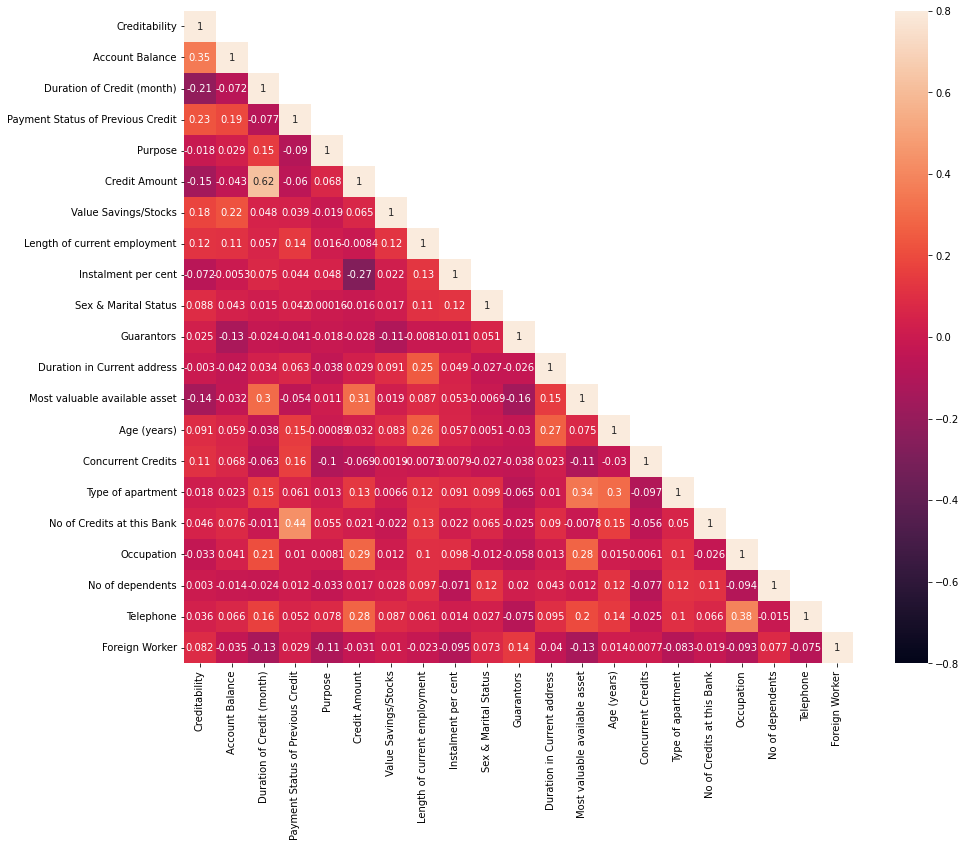

In [11]:
df_corr = df_credit.corr()
mask = np.array(df_corr)
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots(figsize=(15,12))
sns.heatmap(df_corr,mask=mask, annot=True, cbar=True, vmax=0.8, vmin=-0.8)
plt.show()

In [6]:
features = ['Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df_credit[features], df_credit['Creditability'],test_size=0.7,random_state=42)

6000 14000


In [12]:
print('Training dataset size: ')
X_train.shape,y_train.shape

Training dataset size: 


((300, 20), (300,))

In [13]:
print('Testing dataset size: ')
X_test.shape,y_test.shape

Testing dataset size: 


((700, 20), (700,))

In [14]:
summary_col = ['Classifier','Accuracy','Precision','Recall','F1 Score','ROC_AUC']
summary = pd.DataFrame(columns=summary_col)
def summary_score(model_name,y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    #num_acc = accuracy_score(y_test,y_pred,normalize=False)

    prec = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc_score = roc_auc_score(y_test,y_pred)
    #print('test data count',len(y_test))
    print('Model: ',model_name)
    print('--Result in test data set--')
    print('Accuracy score: ', acc)
    print('Precision score', prec)
    print('Recall score: ',recall)
    print('F1 score: ', f1)
    print('ROC_AUC: ', roc_score)
    #print('acc_count',num_acc)
    sum_entry = pd.DataFrame([[model_name,acc*100,prec*100,recall*100,f1*100,roc_score*100]],columns=summary_col)
    return sum_entry 

### Logistic Regression

In [19]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)
y_pred = logistic_model.predict(X_test)
name = logistic_model.__class__.__name__
summary = summary.append(summary_score(name,y_test,y_pred))

Model:  LogisticRegression
--Result in test data set--
Accuracy score:  0.77
Precision score 0.8
Recall score:  0.9014084507042254
F1 score:  0.8476821192052981
ROC_AUC:  0.6748421563865954


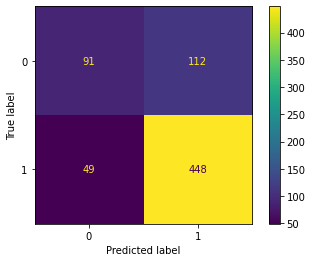

In [40]:
plot_confusion_matrix(logistic_model, X_test, y_test)

In [49]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)
y_prob = logistic_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test.values, y_prob[:,1], pos_label = 1)
J = tpr - fpr
ix = np.argmax(J)
print('Best threshold: ',(thresholds[ix]))

Best threshold:  0.714105697419437


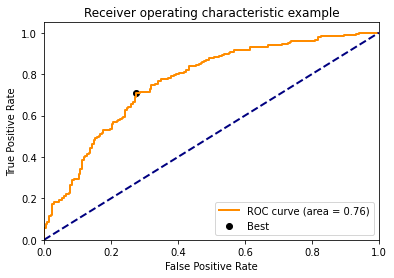

In [50]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [45]:
def to_labels(y_prob, threshold):
    return (y_prob >= threshold).astype('int')
y_pred = to_labels(y_prob[:,1],thresholds[ix])
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc_score = roc_auc_score(y_test,y_pred)
print('Model: ',logistic_model.__class__.__name__)
print('--Result in test data set after chose threshold--')
print('Accuracy score: ', acc)
print('Precision score', prec)
print('Recall score: ',recall)
print('F1 score: ', f1)
print('ROC_AUC: ', roc_score)

Model:  LogisticRegression
--Result in test data set after chose threshold--
Accuracy score:  0.7142857142857143
Precision score 0.8595641646489104
Recall score:  0.7142857142857143
F1 score:  0.7802197802197803
ROC_AUC:  0.7142857142857143


In [46]:
crosstab_log = pd.crosstab(y_test,y_pred)
crosstab_log

col_0,0,1
Creditability,,
0,145,58
1,142,355


### Discriminant

In [29]:
dis_model = LinearDiscriminantAnalysis()
dis_model.fit(X_train,y_train)
y_pred = dis_model.predict(X_test)
name = dis_model.__class__.__name__
summary = summary.append(summary_score(name,y_test,y_pred))

Model:  LinearDiscriminantAnalysis
--Result in test data set--
Accuracy score:  0.7614285714285715
Precision score 0.7989130434782609
Recall score:  0.8873239436619719
F1 score:  0.8408007626310772
ROC_AUC:  0.6702629570526608


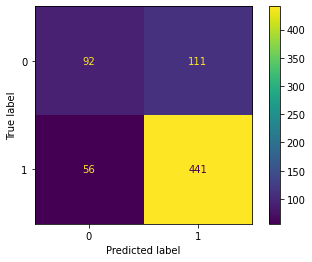

In [38]:
plot_confusion_matrix(dis_model,X_test,y_test)

In [30]:
y_prob = dis_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test.values, y_prob[:,1], pos_label = 1)
J = tpr - fpr
ix = np.argmax(J)
print('Best threshold: ',(thresholds[ix]))

Best threshold:  0.7114945766222283


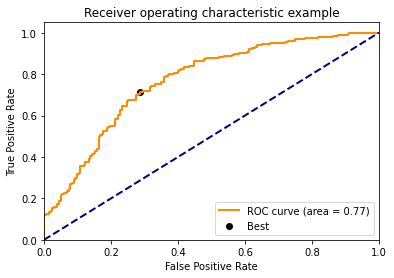

In [31]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [35]:
def to_labels(y_prob, threshold):
    return (y_prob >= threshold).astype('int')
y_pred = to_labels(y_prob[:,1],thresholds[ix])
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc_score = roc_auc_score(y_test,y_pred)
print('Model: ',dis_model.__class__.__name__)
print('--Result in test data set after chose threshold--')
print('Accuracy score: ', acc)
print('Precision score', prec)
print('Recall score: ',recall)
print('F1 score: ', f1)
print('ROC_AUC: ', roc_score)

Model:  LinearDiscriminantAnalysis
--Result in test data set after chose threshold--
Accuracy score:  0.7142857142857143
Precision score 0.8595641646489104
Recall score:  0.7142857142857143
F1 score:  0.7802197802197803
ROC_AUC:  0.7142857142857143


In [39]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Creditability,,
0,145,58
1,142,355


### Random forest

In [51]:
rdf_model = RandomForestClassifier()
rdf_model.fit(X_train,y_train)
y_pred = rdf_model.predict(X_test)
name = rdf_model.__class__.__name__
summary = summary.append(summary_score(name,y_test,y_pred))

Model:  RandomForestClassifier
--Result in test data set--
Accuracy score:  0.7457142857142857
Precision score 0.7853309481216458
Recall score:  0.8832997987927566
F1 score:  0.8314393939393939
ROC_AUC:  0.6460833969333241


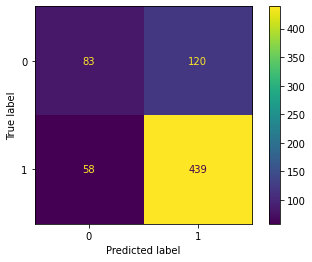

In [52]:
plot_confusion_matrix(rdf_model,X_test,y_test)

In [57]:
y_prob = rdf_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test.values, y_prob[:,1], pos_label = 1)
J = tpr - fpr
ix = np.argmax(J)
print('Best threshold: ',(thresholds[ix]))

Best threshold:  0.73


In [54]:
def to_labels(y_prob, threshold):
    return (y_prob >= threshold).astype('int')
y_pred = to_labels(y_prob[:,1],thresholds[ix])
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc_score = roc_auc_score(y_test,y_pred)
print('Model: ',dis_model.__class__.__name__)
print('--Result in test data set after chose threshold--')
print('Accuracy score: ', acc)
print('Precision score', prec)
print('Recall score: ',recall)
print('F1 score: ', f1)
print('ROC_AUC: ', roc_score)

Model:  LinearDiscriminantAnalysis
--Result in test data set after chose threshold--
Accuracy score:  0.6528571428571428
Precision score 0.8735294117647059
Recall score:  0.5975855130784709
F1 score:  0.7096774193548387
ROC_AUC:  0.6928814264899743


In [55]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Creditability,,
0,160,43
1,200,297


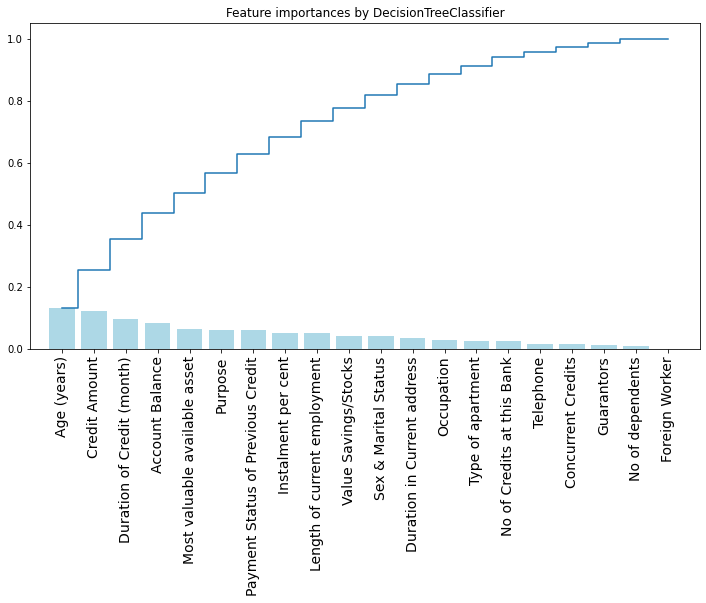

In [59]:
importances = rdf_model.feature_importances_
feat_names = df_credit.drop(['Creditability'],axis=1).columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()